In [1]:
import logging
import os
import pandas as pd

%load_ext autoreload
%autoreload 2

# Disable logging of the program in the notebook
os.environ["LOGLEVEL"] = "CRITICAL"

logging.basicConfig()
logging.root.setLevel(logging.INFO)
logging.basicConfig(level=logging.INFO)

logger = logging.getLogger('__main__')
logger.setLevel(os.environ.get("LOGLEVEL", logging.FATAL))

pybooklogger = logging.getLogger('pybook')
pybooklogger.setLevel(logging.DEBUG)

%aimport setup

%load_ext autoreload
%autoreload 2

from setup import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Track Layout
Calculate the layout of the dutch railway system


In [2]:
layout_file =   "../data/prorail/parsed/netherlands-schiphol.json"
layout = Layout(layout_file)

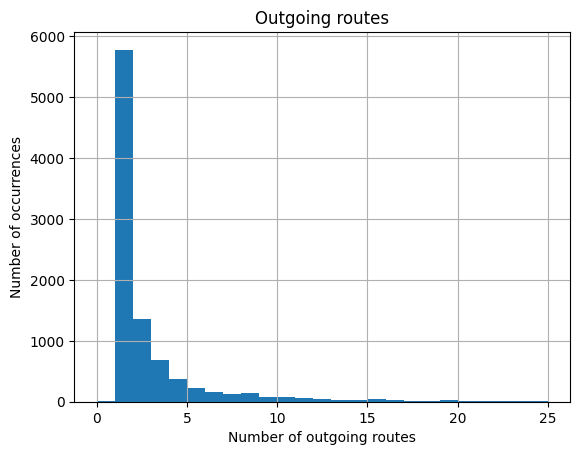

In [3]:
edges_df = pd.DataFrame({"Outgoing routes": [len(n.outgoing) for n in layout.g_block.nodes.values() if len(n.outgoing) <= 25]})
hist = edges_df.hist(bins=25, )
plt.xlabel("Number of outgoing routes")
plt.ylabel("Number of occurrences")
plt.show()

# Experiment Runtime
Take a route of an agent with many stops, and run from start to every stop as an experiment

## Scenario

In [4]:
scenario_file = "../data/prorail/scenarios/SHL-2025-06-30.json"
# Replan these agents, -1 is planning in a new agent
agent_id = 1
scenario = Scenario(layout, scenario_file, agent_id)

## Experiment
Define three experiments:
1. Classical @SIPP, no extra flexibility
2. FlexSIPP but not including the recovery time
3. FlexSIPP

In [5]:
# Setup experiment
experiment_settings = [
    {
        "start_time": 1080,
        "origin": "SHL|6",
        "destination": "RTD|2",
        "metadata": {
            "offset": 2,
        }
    },
    {
        "start_time": 1080,
        "max_buffer_time": 500,
        "origin": "SHL|6",
        "destination": "RTD|2",
        "metadata": {
            "color": "Green",
            "label": "Buffer time",
            "offset": 1,
        }
    },{
        "start_time": 1080,
        "origin": "SHL|6",
        "destination": "RTD|2",
        "max_buffer_time": 500,
        "use_recovery_time": True,
        "metadata": {
            "color": "Blue",
            "label": "Recovery time",
        }
    }
]

experiments = setup_experiment(scenario, experiment_settings)

### Blocking staircase diagram
Showing the route of the agent with the most stops, its quite long.


C:\Users\erick\Documents\Uni\Thesis\delay-replanning-slack\generation\safe_interval_graph.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([str(timedelta(seconds=ytick)) for ytick in ax.get_yticks()])


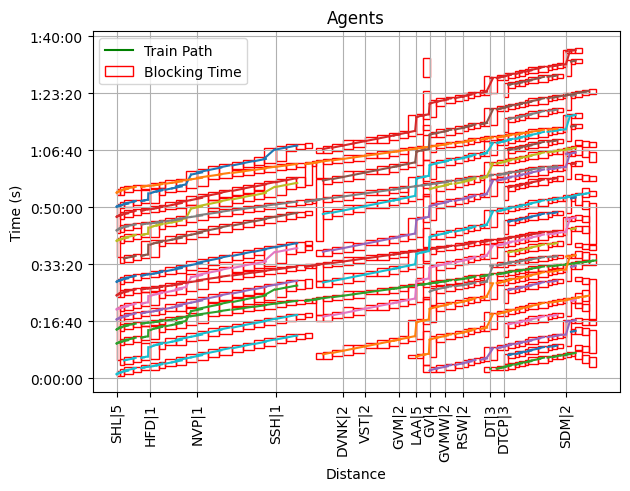

C:\Users\erick\Documents\Uni\Thesis\delay-replanning-slack\generation\safe_interval_graph.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([str(timedelta(seconds=ytick)) for ytick in ax.get_yticks()])


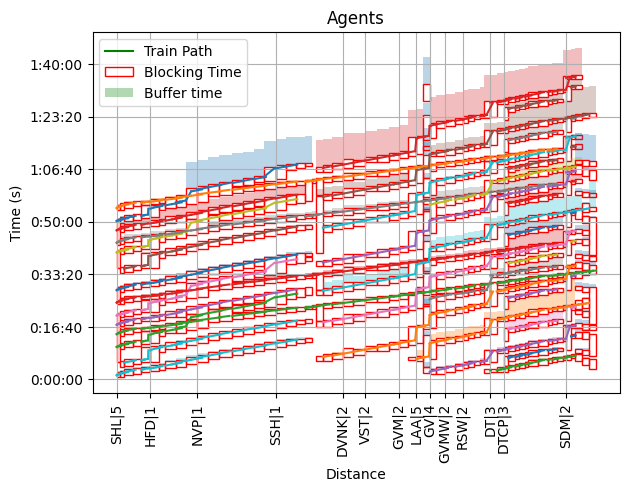

C:\Users\erick\Documents\Uni\Thesis\delay-replanning-slack\generation\safe_interval_graph.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([str(timedelta(seconds=ytick)) for ytick in ax.get_yticks()])


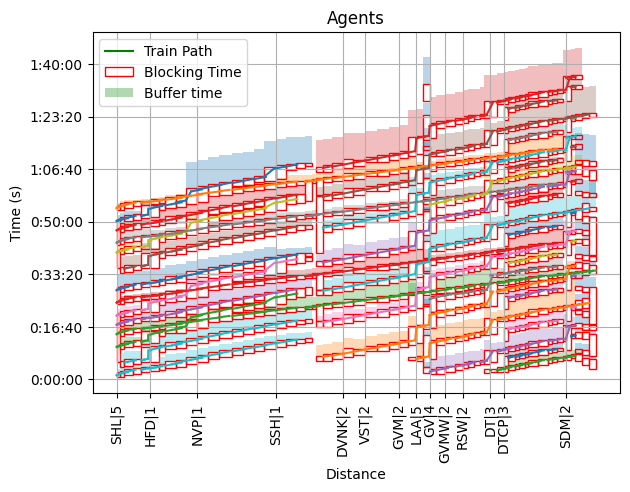

In [6]:
for exp in experiments:
    exp.s.plot(agent_id, exp.buffer_times, exp.recovery_times, False)

In [7]:
timeout = 600
run_experiments(experiments, timeout)

## Results

### ATF Plot

C:\Users\erick\Documents\Uni\Thesis\delay-replanning-slack\experiments\setup.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels([str(timedelta(seconds=xtick)) for xtick in axs[0].get_xticks()])
C:\Users\erick\Documents\Uni\Thesis\delay-replanning-slack\experiments\setup.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_yticklabels([str(timedelta(seconds=ytick)) for ytick in axs[0].get_yticks()])
C:\Users\erick\Documents\Uni\Thesis\delay-replanning-slack\experiments\setup.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels([str(timedelta(seconds=xtick)) for xtick in axs[1].get_xticks()])


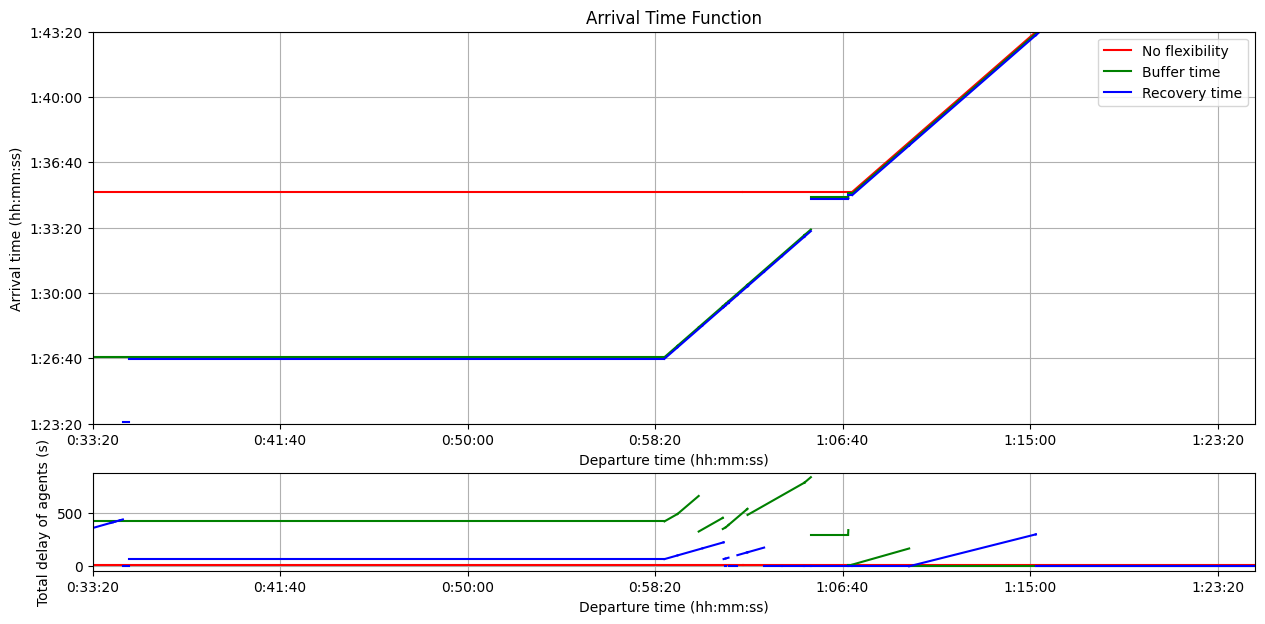

C:\Users\erick\Documents\Uni\Thesis\delay-replanning-slack\experiments\setup.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels([str(timedelta(seconds=xtick)) for xtick in axs[0].get_xticks()])
C:\Users\erick\Documents\Uni\Thesis\delay-replanning-slack\experiments\setup.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_yticklabels([str(timedelta(seconds=ytick)) for ytick in axs[0].get_yticks()])
C:\Users\erick\Documents\Uni\Thesis\delay-replanning-slack\experiments\setup.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels([str(timedelta(seconds=xtick)) for xtick in axs[1].get_xticks()])


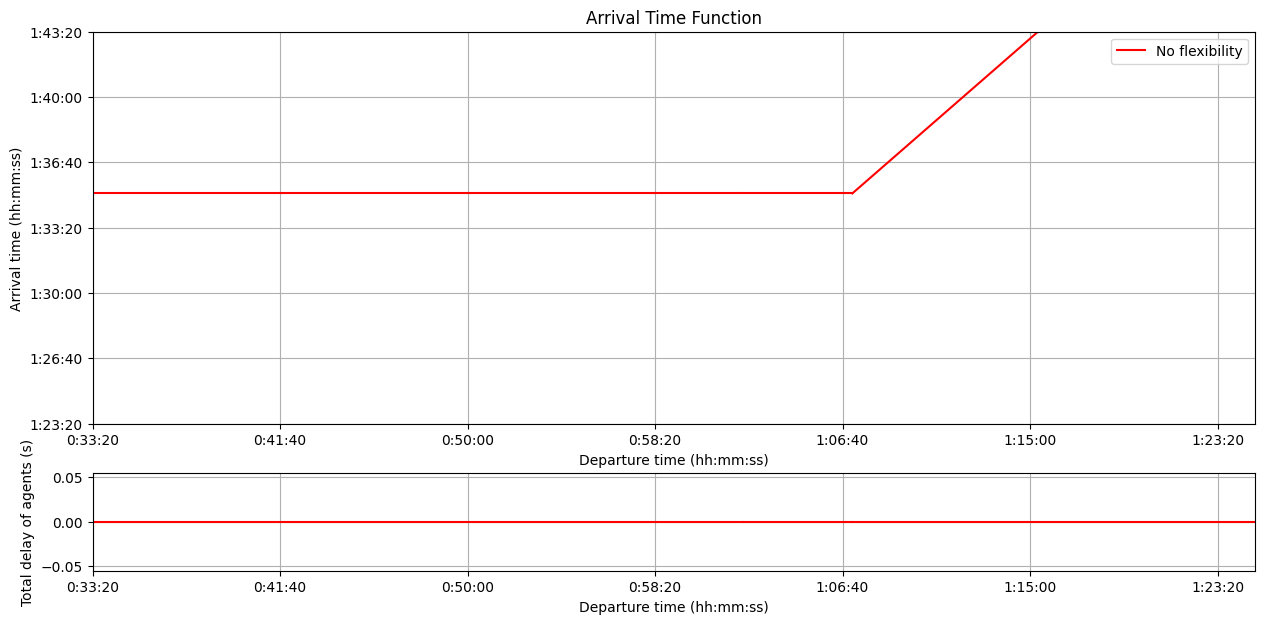

C:\Users\erick\Documents\Uni\Thesis\delay-replanning-slack\experiments\setup.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels([str(timedelta(seconds=xtick)) for xtick in axs[0].get_xticks()])
C:\Users\erick\Documents\Uni\Thesis\delay-replanning-slack\experiments\setup.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_yticklabels([str(timedelta(seconds=ytick)) for ytick in axs[0].get_yticks()])
C:\Users\erick\Documents\Uni\Thesis\delay-replanning-slack\experiments\setup.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels([str(timedelta(seconds=xtick)) for xtick in axs[1].get_xticks()])


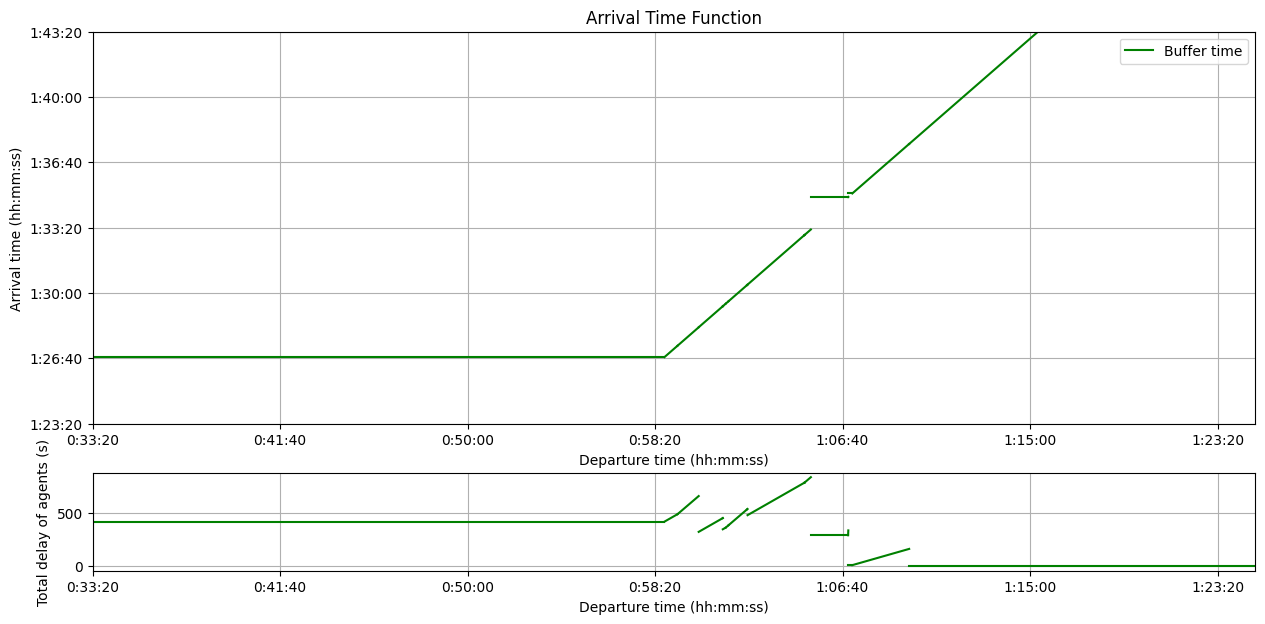

C:\Users\erick\Documents\Uni\Thesis\delay-replanning-slack\experiments\setup.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels([str(timedelta(seconds=xtick)) for xtick in axs[0].get_xticks()])
C:\Users\erick\Documents\Uni\Thesis\delay-replanning-slack\experiments\setup.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_yticklabels([str(timedelta(seconds=ytick)) for ytick in axs[0].get_yticks()])
C:\Users\erick\Documents\Uni\Thesis\delay-replanning-slack\experiments\setup.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels([str(timedelta(seconds=xtick)) for xtick in axs[1].get_xticks()])


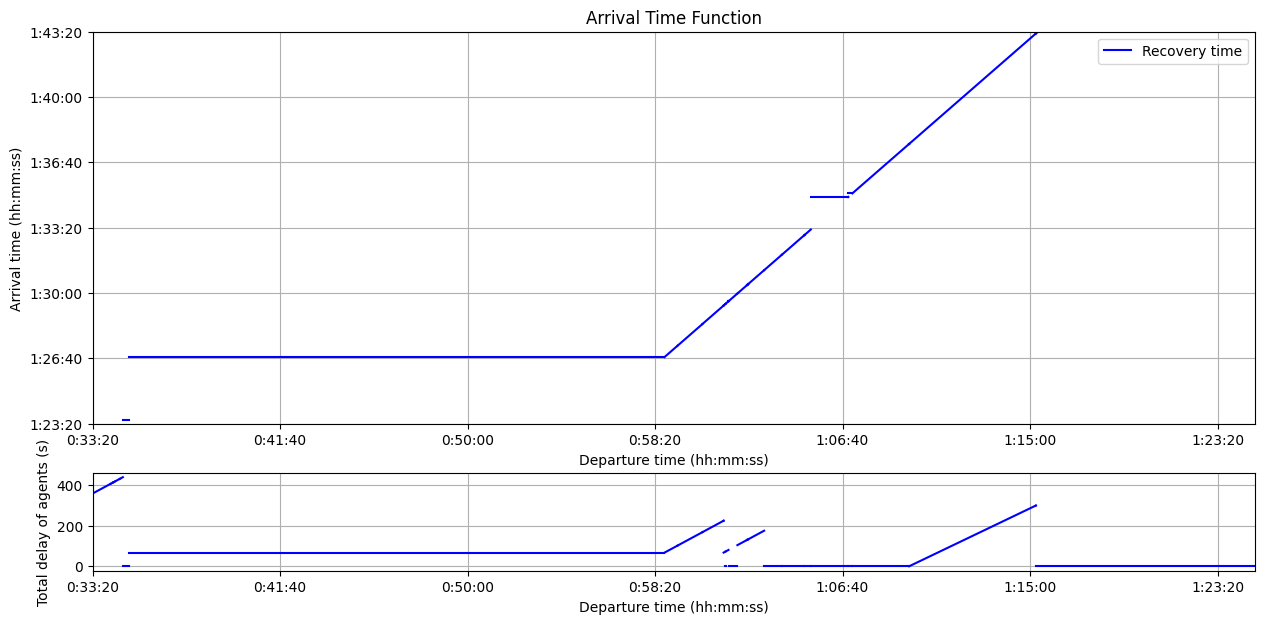

In [13]:
experiments[0].metadata = {'color': 'Red', 'label': 'No flexibility', 'offset': 5}
experiments[1].metadata = {'color': 'Green', 'label': 'Buffer time', 'offset': 0}
experiments[2].metadata = {'color': 'Blue', 'label': 'Recovery time', 'offset': -5}

kwargs = {"min_x": 2000, "max_x": 5100, "min_y": 5000, "max_y": 6200}
plot_experiments(experiments, **kwargs)


experiments[0].metadata = {'color': 'Red', 'label': 'No flexibility', 'offset': 0}
experiments[1].metadata = {'color': 'Green', 'label': 'Buffer time', 'offset': 0}
experiments[2].metadata = {'color': 'Blue', 'label': 'Recovery time', 'offset': 0}

plot_experiments([experiments[0]], **kwargs)
plot_experiments([experiments[1]], **kwargs)
plot_experiments([experiments[2]], **kwargs)

### Time statistics

In [ ]:
def sum_cols(df1, cols, name):
    df2 = df1.drop(columns=cols)
    df2[name] = df1[cols].sum(axis=1)
    return df2

time_df = pd.DataFrame([exp.get_running_time() for exp in experiments], index=[exp.metadata['label'] for exp in experiments])

setup_cols = ["track graph creation", "routing graph creation"]
recompute_cols = ["unsafe interval generation", "safe interval generation", "bt and crt generation", "converting routes to blocks"]
search_cols = ["FlexSIPP search time"]

time_df = sum_cols(time_df, setup_cols, "Setup Time")
time_df = sum_cols(time_df, recompute_cols, "Recompute Time")
time_df = sum_cols(time_df, search_cols, "Search Time")
time_df

### Search Node Statistics


In [ ]:
nodes_df = pd.DataFrame([exp.get_complexity() for exp in experiments], index=[exp.metadata['label'] for exp in experiments])

nodes_df

### Output paths found


In [ ]:
for key, value in experiments[2].results[3].items():
    delayed_trains = {i: v for i,v in enumerate(value[0][4]) if float(v[0]) > 0}
    print(f"{key.replace('r-', '')}\nearliest departure: {int(min(float(value[0][1]), float(value[0][2])) / 60)}\ndepart before: {int(float(value[0][2]) / 60)}\narrive at: {int((float(value[0][1]) + float(value[0][3])) / 60)}\ndelays trains: {delayed_trains}")

### Path statistics


In [ ]:
for exp in experiments:
    print(f"Differend paths found for {exp.metadata['label']}: {sum(exp.results[2].values())}")